<a href="https://colab.research.google.com/github/nikhilumare/hotel-booking-analysis/blob/main/EDA_of_Hotel_Booking_Analysis_Nikhil_Umare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [46]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
#Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#csv file location
file_path="/content/drive/MyDrive/Colab Notebooks/EDA/Hotel Bookings.csv"

In [49]:
# reading csv file
df= pd.read_csv(file_path)

# Data Exploration

In [50]:
# let us check the data
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [51]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [52]:
# Checking first 5 rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [53]:
# Checking first 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [54]:
# list of columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [55]:
#looking at the min, max values,mean values etc. NAN values
#This function  gives numerical information information
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [56]:
#looking for the data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Description:
**hotel** : Hotel(Resort Hotel or City Hotel)

**is_canceled** : Value indicating if the booking was canceled (1) or not (0)

**lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of arrival date

**arrival_date_week_number** : Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults** : Number of adults

**children** : Number of children

**babies** : Number of babies

**meal** : Type of meal booked. Categories are presented in standard hospitality meal packages:

**country** : Country of origin.`

**market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type** : Code for the type of room assigned to the booking.

**booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type** : Indication on if the customer made a deposit to guarantee the booking.

**agent** : ID of the travel agency that made the booking

**company** : ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type** : Type of booking, assuming one of four categories

**adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**: Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [57]:
# creating a copy of our dataset
hotel_df=df.copy()

In [58]:
# converting object type to datetime
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')

# Data Cleaning

In [59]:
# checking for the duplicate rows
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [60]:
# removing duplicates
hotel_df.drop_duplicates(inplace = True)

In [61]:
#Checking for null values
hotel_df.isna().sum().sort_values(ascending =False)[:6]



company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

So we Have Null values in columns- Company, agent, Country,children.

1.for company and agent I will fill the Missing values with 0

2.for country I will fill Missing values with object 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)

3.As the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [62]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  hotel_df[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
hotel_df['country'].fillna('others',inplace=True)

In [63]:
#Successfully handled  Null Values
hotel_df.isna().sum().sort_values(ascending=False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [64]:
hotel_df[hotel_df.adults + hotel_df.babies + hotel_df.children == 0].shape

(166, 32)

In [65]:
# dropping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
hotel_df.drop(hotel_df[hotel_df.adults + hotel_df.babies + hotel_df.children == 0].index, inplace = True)

In [66]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(hotel_df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(hotel_df.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(hotel_df[col].unique())}')


Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']


# Removing outliers and adding some columns

In [67]:
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']   
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']  

Removing an outlier from Average_daily_rate column

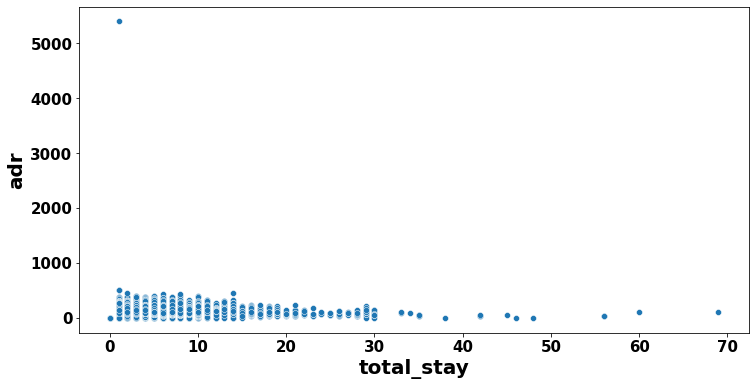

In [68]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

In [69]:

# Removing all values > 5000
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

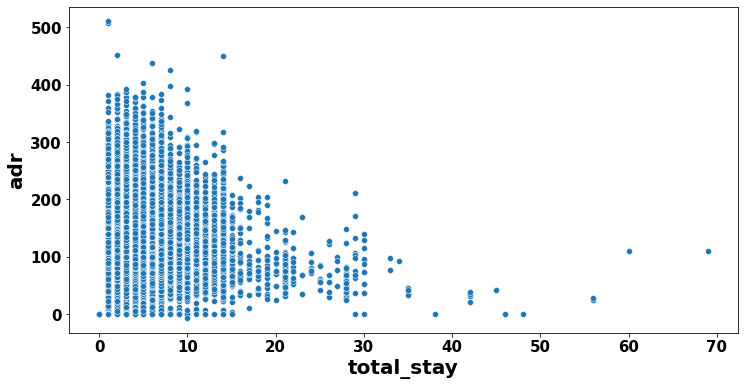

In [70]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

From the scatter plot we can see that as length of total_stay increases the adr decreases. This means for longer stay, the better deal(discounts) for customer can be finalised.

Removing outliers from 'stays_in weekend_nights' and 'stays_in_week_nights

In [71]:
hotel_df.loc[hotel_df.stays_in_weekend_nights >= 5,'stays_in_weekend_nights']=  5  #greater than 5 stays are assigned to 5 stays
hotel_df.loc[hotel_df.stays_in_week_nights >= 10,'stays_in_week_nights']= 10  #greater than 5 stays are assigned to 5 stays

In [72]:
#adding new column
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']
hotel_df.loc[hotel_df.total_people > 20, 'total_people'] = 20  #Removing outliers


In [73]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87229 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87229 non-null  object        
 1   is_canceled                     87229 non-null  int64         
 2   lead_time                       87229 non-null  int64         
 3   arrival_date_year               87229 non-null  int64         
 4   arrival_date_month              87229 non-null  object        
 5   arrival_date_week_number        87229 non-null  int64         
 6   arrival_date_day_of_month       87229 non-null  int64         
 7   stays_in_weekend_nights         87229 non-null  int64         
 8   stays_in_week_nights            87229 non-null  int64         
 9   adults                          87229 non-null  int64         
 10  children                        87229 non-null  float64       
 11  b

Creating subset dataframes for 'City' and 'Resort' hotel data

In [74]:
City_df =pd.DataFrame(hotel_df[hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(hotel_df[hotel_df['hotel'] =='Resort Hotel'])

In [75]:
# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# Exploratory Data analysis (EDA)

Bivariate Analysis

1) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Pie Chart for most preffered hotel')

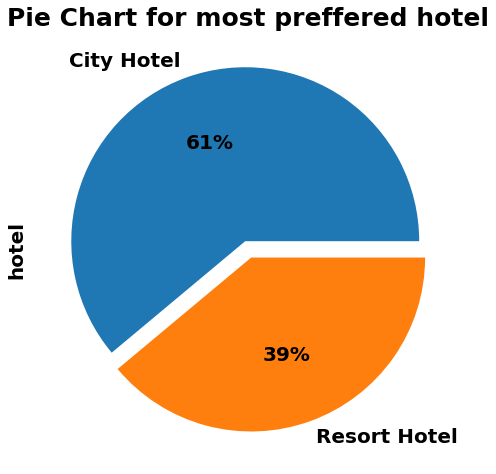

In [76]:
Hotel_typ =hotel_df['hotel'].value_counts()
Hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(12,8),explode =[0.05]*2,fontsize=20) 
plt.title('Pie Chart for most preffered hotel')

**Observation**:

City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

2) Which Distribution channel is mostly used for hotel bookings?

Text(0.5, 1.0, 'Booking % by distribution channel')

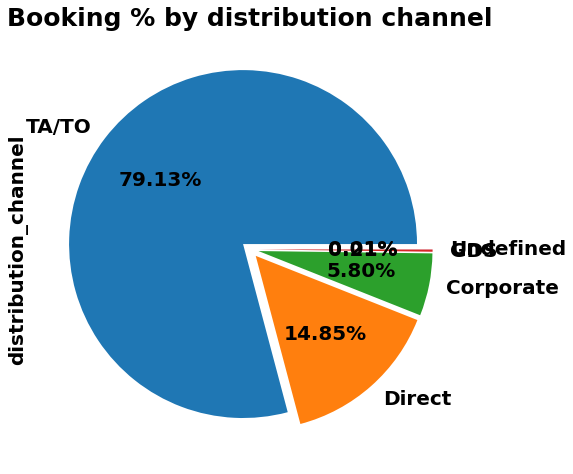

In [77]:
booking_distibution_typ =hotel_df['distribution_channel'].value_counts()
booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'} ,figsize =(12,8),explode = [0.05]*5,fontsize=20)
plt.title('Booking % by distribution channel')

**Obsevation**:
Most 79% people prefer'TA/TO' for booking

3)Which agent made the maximum bookings?

In [78]:
# return highest bookings made by agents
highest_bookings= hotel_df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

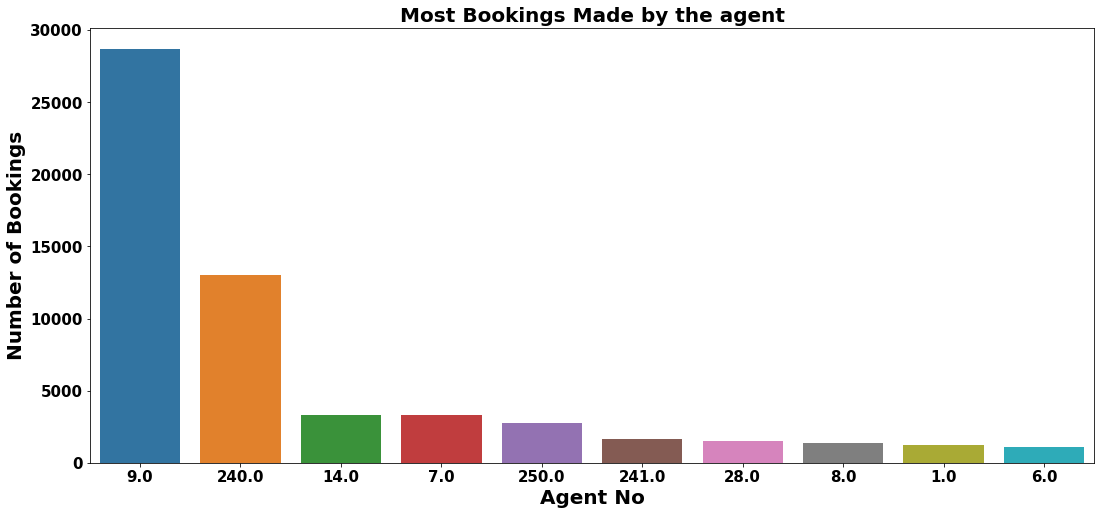

In [79]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No',fontweight ='bold', size =20)
plt.ylabel('Number of Bookings',fontweight ='bold', size =20)
plt.title("Most Bookings Made by the agent",fontweight ='bold', size =20)


**Observation**:

Agent ID no: 9 made most of the bookings

4) What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentage (%) of repeated guests')

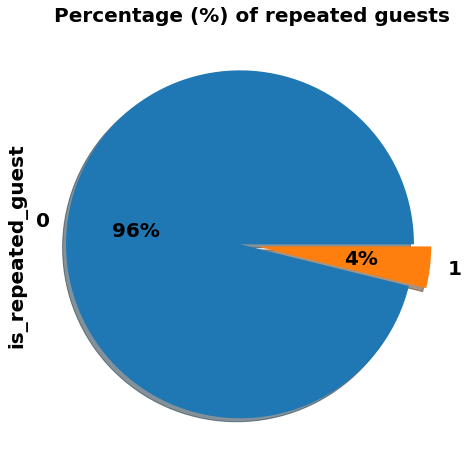

In [80]:
hotel_df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.0f%%',shadow=True,figsize=(10,8),fontsize=20)

plt.title(' Percentage (%) of repeated guests',fontweight ='bold', size =20)

**Obsevation**:

only 4% people are repeated guests. The guest retention rate is very low

5) Which type of food is mostly preferred by the guests?

Text(0.5, 1.0, 'Preferred Meal Type')

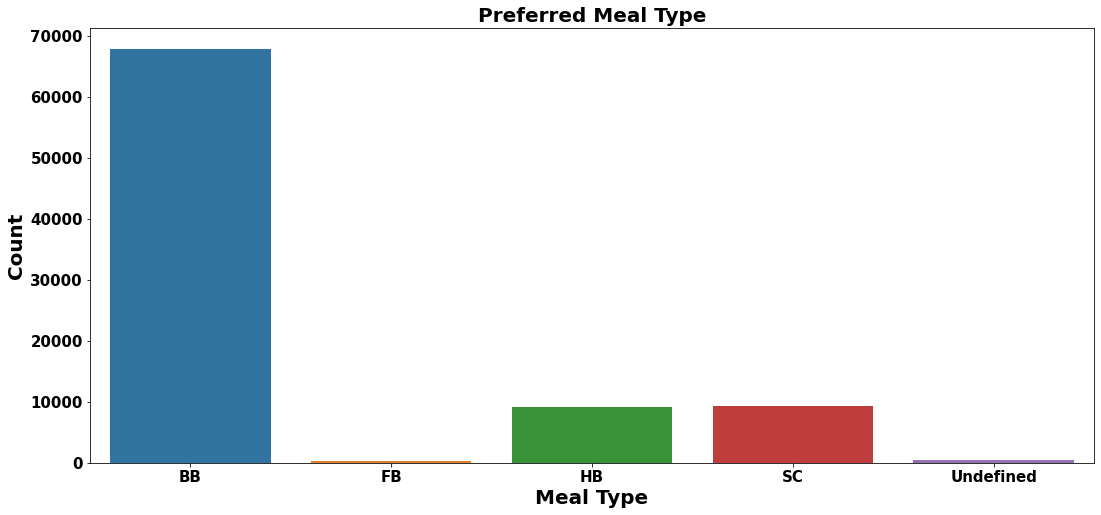

In [81]:
plt.figure(figsize=(18,8))
sns.countplot(x=hotel_df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type",fontweight ='bold', size =20)


Types of meal in hotels:

BB - (Bed and Breakfast)
HB- (Half Board)
FB- (Full Board)
SC- (Self Catering)

**Observation**:
* So the most preferred meal type by the guests is BB( Bed and Breakfast)
* HB- (Half Board) and SC- (Self Catering) are equally preferred.

6)What is the percentage distribution of required_car_parking_spaces?

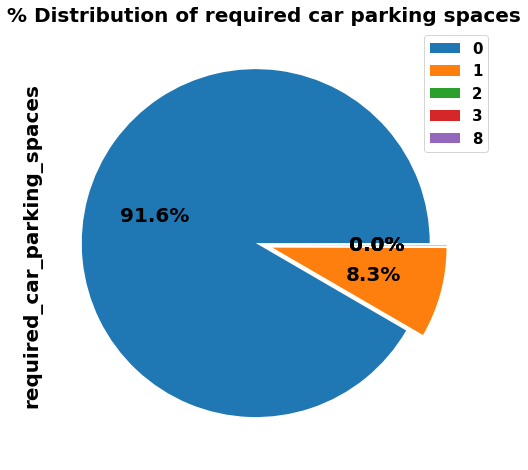

In [82]:
hotel_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=20,labels=None)

labels=hotel_df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces',fontweight ='bold', size =20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**:

91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

7) What is the percentage distribution of "Customer Type"?

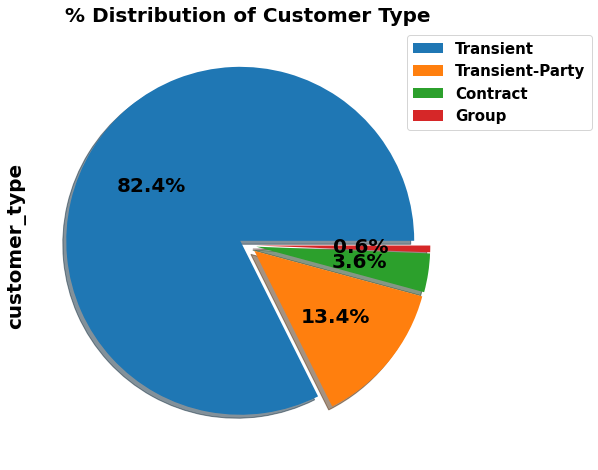

In [83]:
hotel_df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=20,labels=None)


labels=hotel_df['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type',fontweight ='bold', size =20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

1. Contract

when the booking has an allotment or other type of contract associated to it

2. Group

when the booking is associated to a group

3. Transient

when the booking is not part of a group or contract, and is not associated to other transient booking

4. Transient-party

when the booking is transient, but is associated to at least other transient booking

**Observation**:

Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

8)Which is the most preferred room type by the customers?

Text(0.5, 1.0, 'Most preferred Room type')

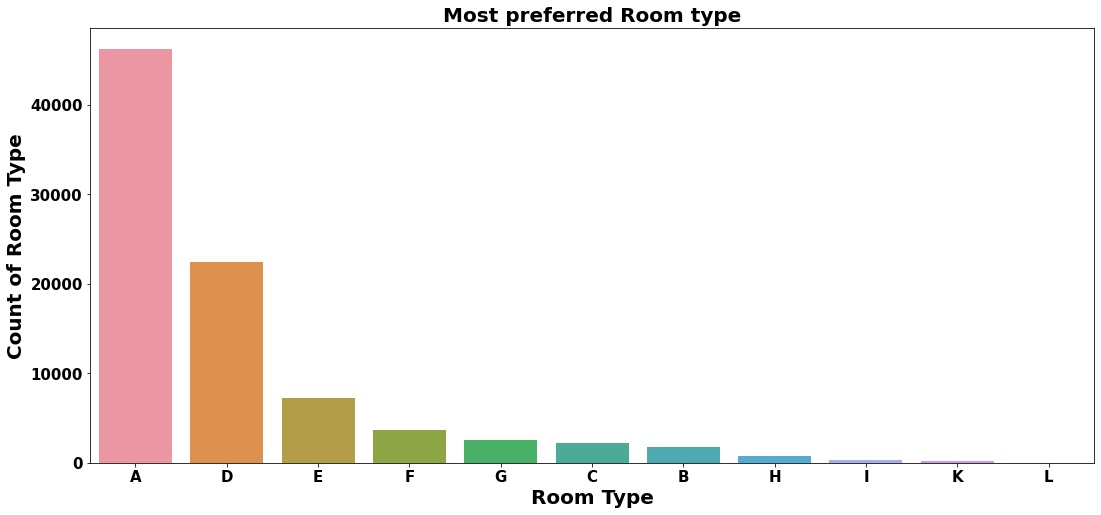

In [84]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=hotel_df['assigned_room_type'],order=hotel_df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type",fontweight ='bold', size =20)

**Observation**:

So the most preferred Room type is "A".


9)What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

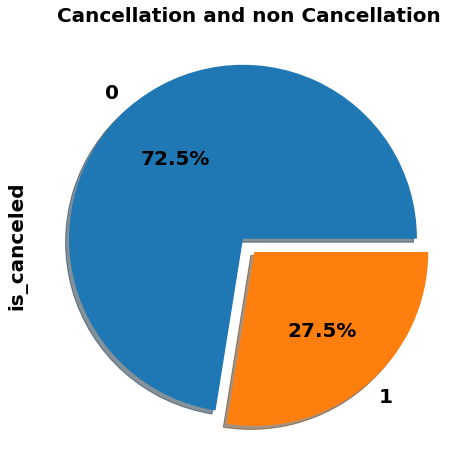

In [85]:
hotel_df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation",fontweight ='bold', size =20)

**Observation** :

0= not cancelled

1= cancelled

27.5 % of the bookings were cancelled.

10)What is Percentage distribution of Deposite type ?

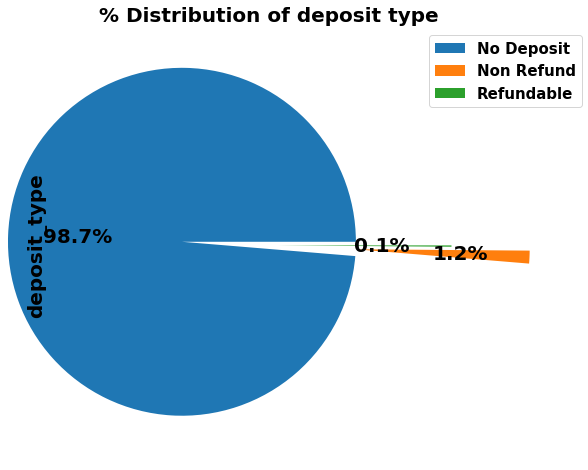

In [86]:
hotel_df['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type",fontweight ='bold', size =20)
labels=hotel_df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**:

98.7 % of the guests prefer "No deposit" type of deposit.

11) From which country the most guests are coming?

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

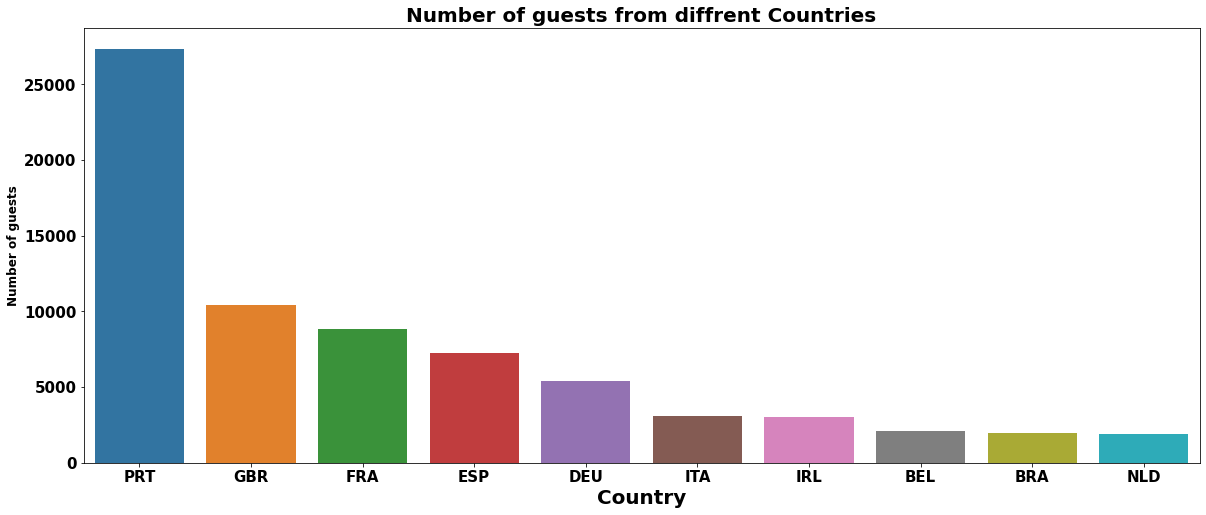

In [87]:
# Counting the guests from various countries.
country_df=hotel_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries",fontweight ='bold', size =20)

**Observation**:

Most of the guests are coming from portugal i.e more 25000 guests are from portugal

12)In which month most of the bookings happened?

In [88]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=hotel_df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7488
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

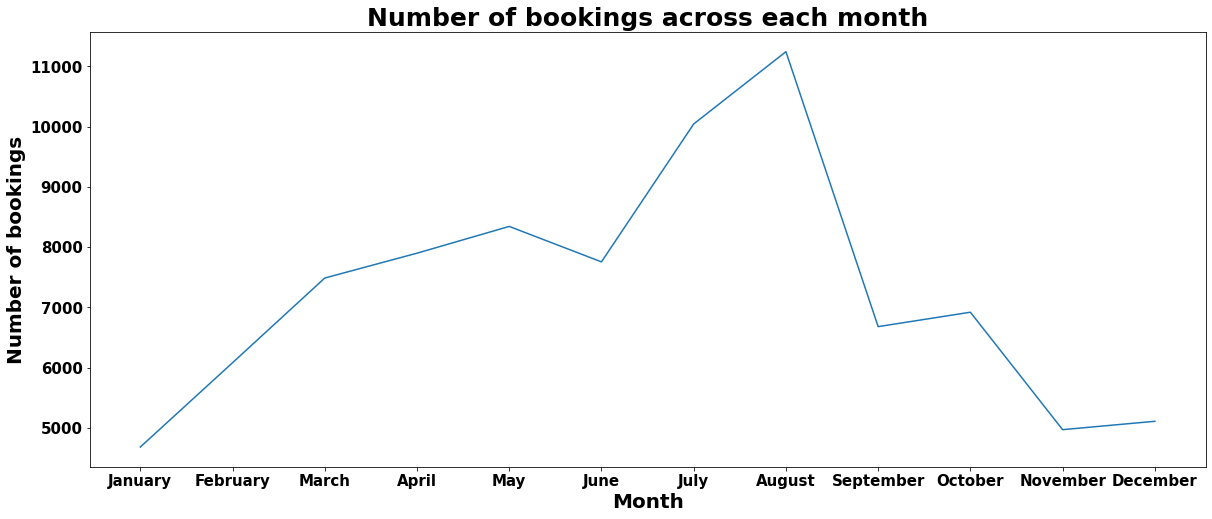

In [89]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

**Observation**:

July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

13) Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise bookings')

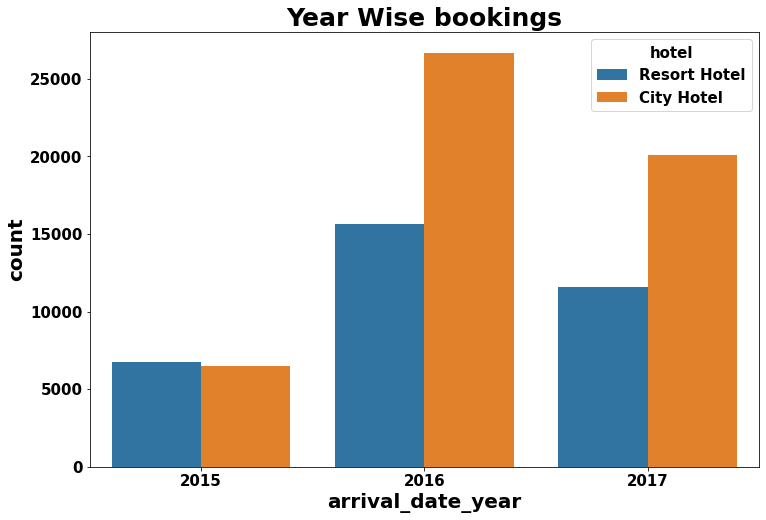

In [90]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=hotel_df['arrival_date_year'],hue=hotel_df['hotel'])
plt.title("Year Wise bookings")

**Observation**:
2016 had the higest bookings. 2015 had less 7000 bookings. overall City hotels had the most of the bookings

Bivariate and Multivariate Analysis

In [91]:
# group by hotel
grup_by_hotel=hotel_df.groupby('hotel')

1)Which hotel has highest percentage of booking cancellation?

Text(0.5, 1.0, 'Percentage of booking cancellation')

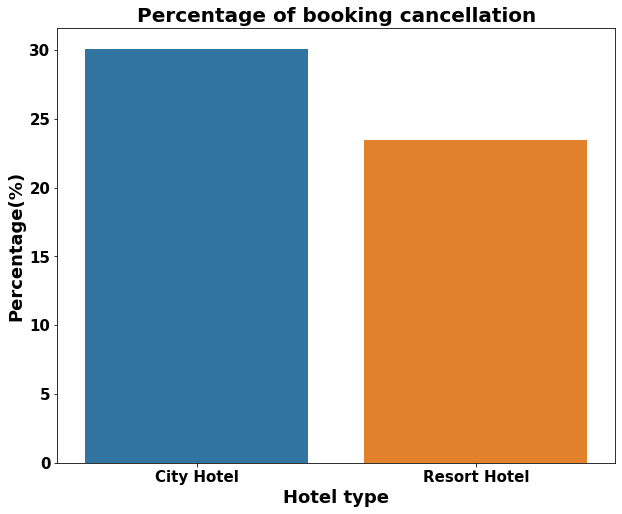

In [92]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are canceled.
cancelled_df=hotel_df[hotel_df['is_canceled']==1]

# Grouping by hotel
cancelled_df=cancelled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_canceled_bookings"})

# adding 'total booking column for calculating the percentage.
cancelled_df['total_bookings']=hotel_df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
cancelled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=cancelled_df['hotel'],y=cancelled_df['no_of_canceled_bookings']*100/cancelled_df['total_bookings'])

#set labels
plt.xlabel('Hotel type',fontsize=18)
plt.ylabel('Percentage(%)',fontsize=18)
plt.title("Percentage of booking cancellation",fontsize=20)

**Obsevation:**
City hotel has 30% of booking cancellation

2) Which hotel type has the more lead time?

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

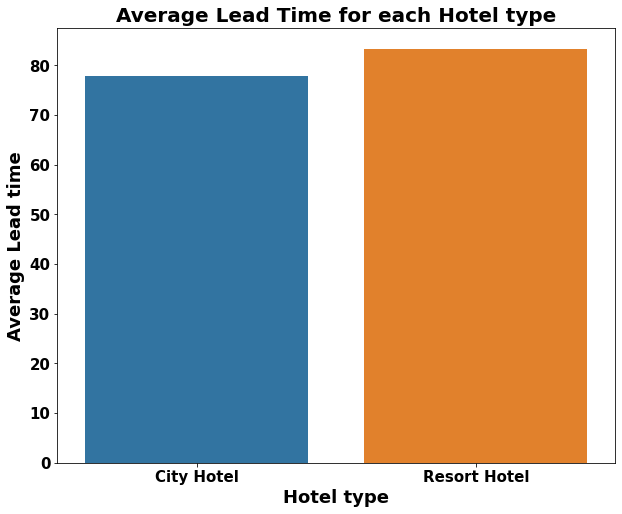

In [93]:
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type',fontsize=18)
plt.ylabel('Average Lead time',fontsize=18)
plt.title("Average Lead Time for each Hotel type",fontsize=20)

**Observation:**

Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

3) Which Hotel type has the highest ADR?

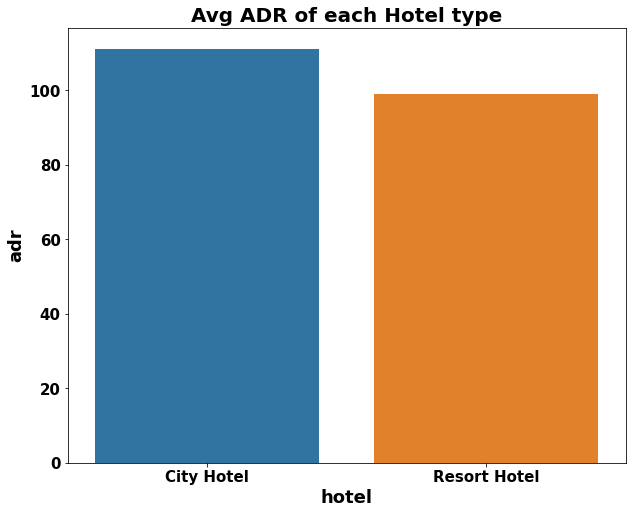

In [94]:
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type',fontsize=18)
plt.ylabel('ADR',fontsize=18)
plt.title("Avg ADR of each Hotel type",fontsize=20)

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

**Observation**:

City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

4) Which Hotels has the most repeated guests?

Text(0.5, 1.0, 'Most repeated guests for each hotel')

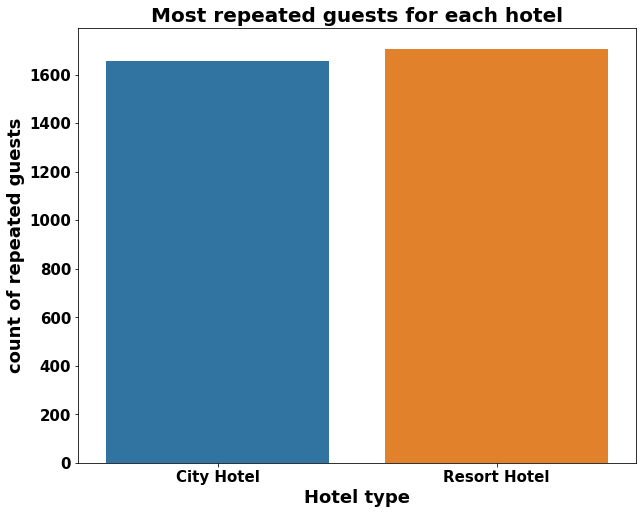

In [95]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=hotel_df[hotel_df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type',fontsize=18)
plt.ylabel('count of repeated guests',fontsize=18)
plt.title("Most repeated guests for each hotel",fontsize=20)

**Observation:**
Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

5)Which hotel has longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

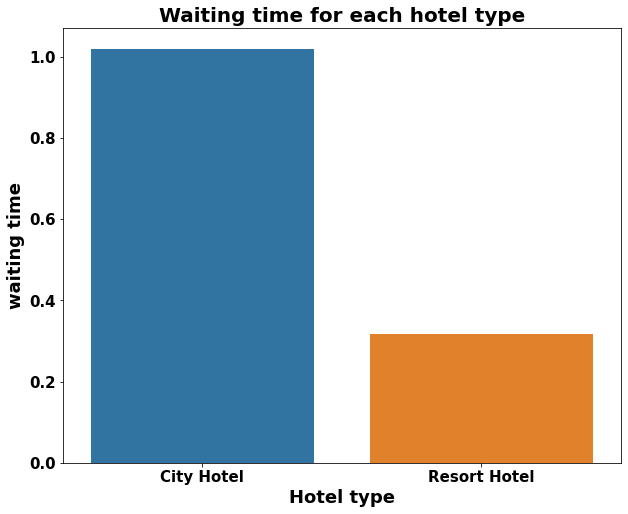

In [96]:
#grouping by hotel and taking mean of days in waiting list
waiting_time_df=hotel_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type',fontsize=18)
plt.ylabel('waiting time',fontsize=18)
plt.title("Waiting time for each hotel type",fontsize=20)

**Observation:**

So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

6) What is the ADR across the different month

In [97]:
#groupby
bookings_by_months_df=hotel_df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,94.096062
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0, 0.5, 'ADR')

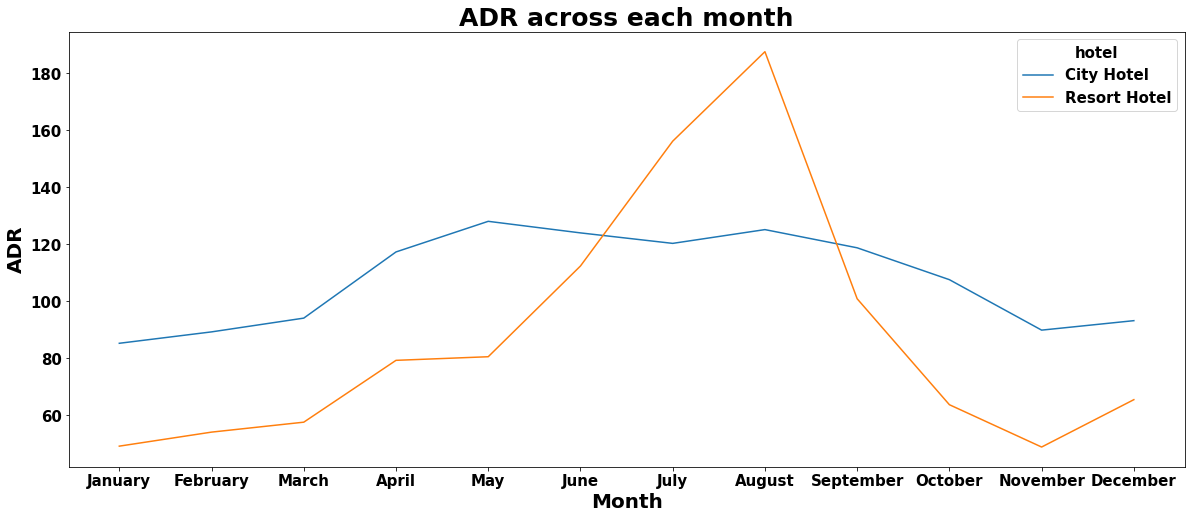

In [98]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

**Observation:**

For Resort hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

7)Which Market Segment has the higest cancellation rate?

In [99]:
market_segment_df=hotel_df[hotel_df['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1256


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

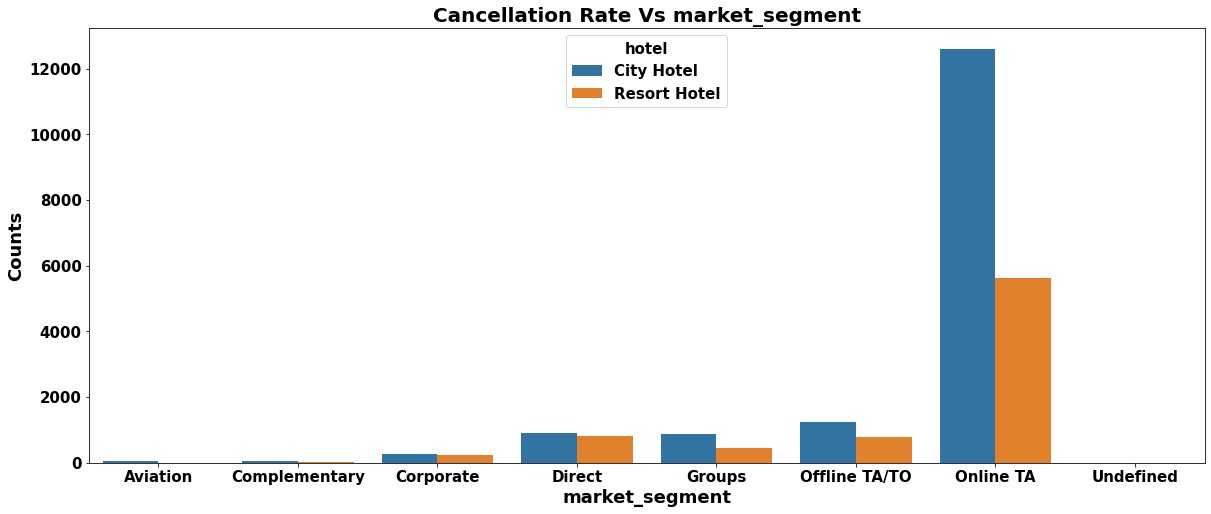

In [100]:
#set plotsize and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.title('Cancellation Rate Vs market_segment',fontsize=20)

**Observation**:

'Online T/A' has the highest cancellation in both type of cities

In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

8) Which distribution channel has the higest cancellation rate?

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

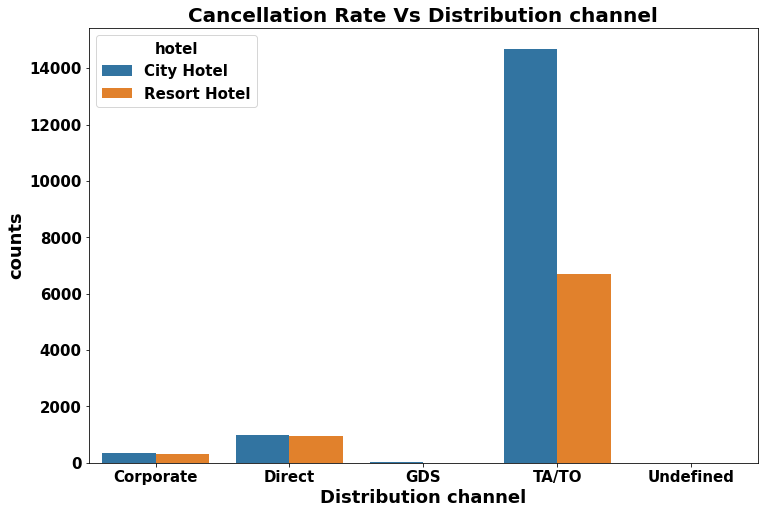

In [101]:
canceled_df=hotel_df[hotel_df['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel',fontsize=18)
plt.ylabel('counts',fontsize=18)
plt.title('Cancellation Rate Vs Distribution channel',fontsize=20)

**Observation:**

In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.

In "direct" both the hotels has almost same cancellation rate.


9)Which distribution channel contributed more to adr in order to increase the the income.?

Text(0.5, 1.0, 'ADR across Distribution channel')

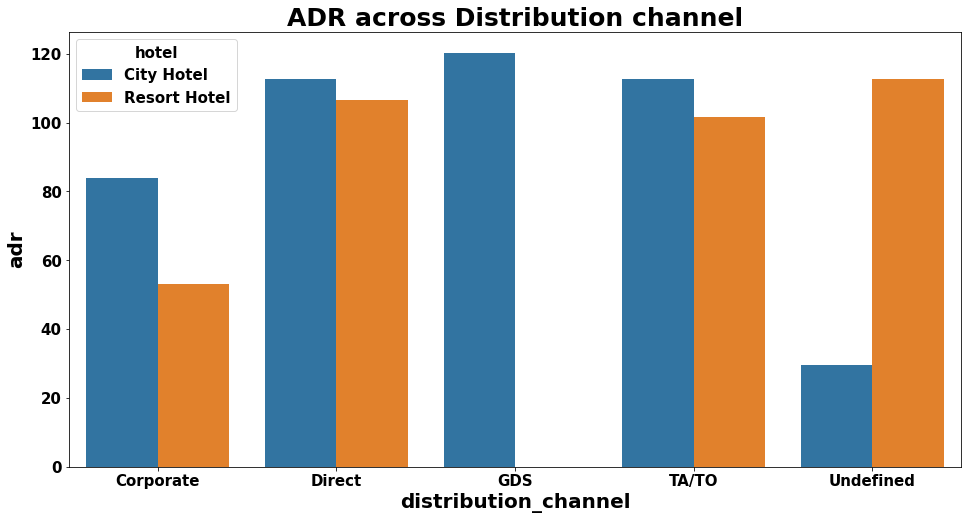

In [102]:
# group by distribution channel and hotel
distribution_channel_df=hotel_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

* Corporate- These are corporate hotel booing companies which makes bookings 
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

 **Observation**
 
From the plot is clear that 
 'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.

  GDS has highly contributed in adr in 'City Hotel' type.

 GDS needs to increase Resort Hotel bookings.

10)Relationship between ADR and total stay.

In [103]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = hotel_df.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,212.10,Resort Hotel
17996,7,212.14,Resort Hotel
17997,7,212.29,City Hotel
17998,7,212.29,Resort Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

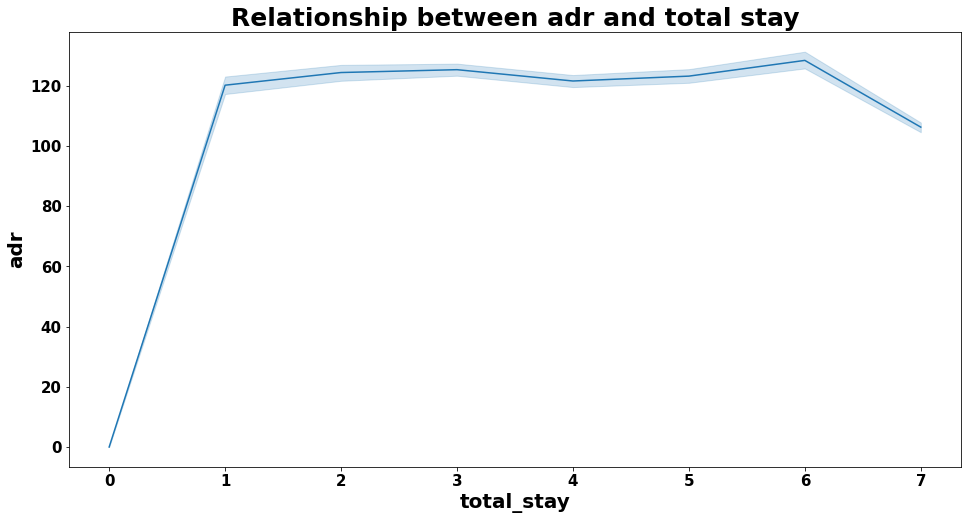

In [104]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

As the total stay increases the adr also increases.

11)What is the Optimal stay length in both types of hotels ?

In [105]:
stay = hotel_df.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns

Text(0.5, 0, 'total_stay(days)')

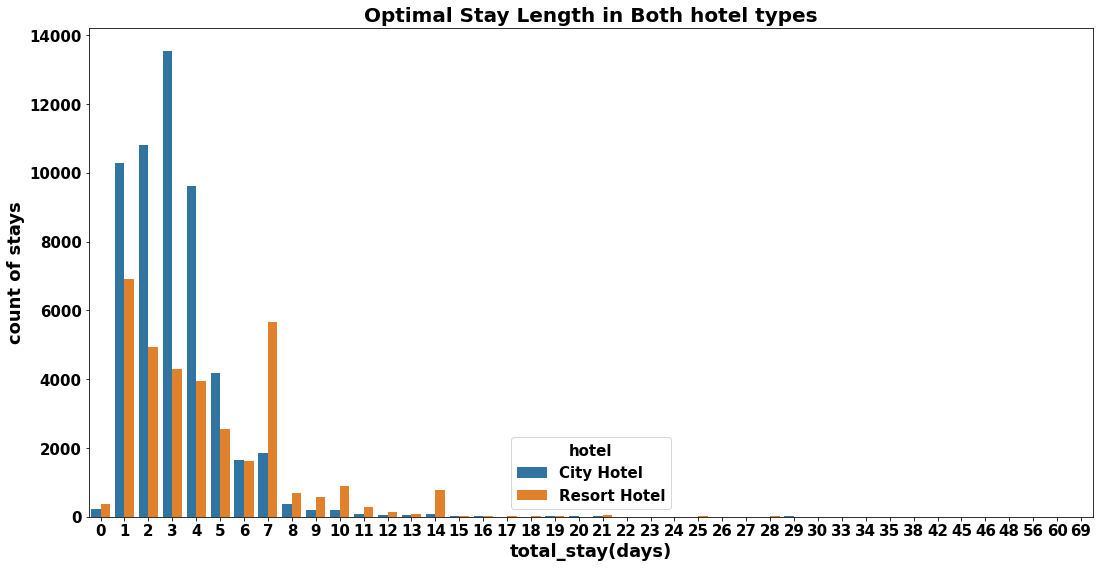

In [106]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types',fontsize=20)
plt.ylabel('count of stays',fontsize=18)
plt.xlabel('total_stay(days)',fontsize=18)

**Observation:**

Optimal stay in both the type hotel is less than 7 days.

12) Does the guests alloted with the same room type which was reserved by them?

In [107]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0  

([<matplotlib.axis.XTick at 0x7f2163d67310>,
 [Text(0, 0, 'Not canceled'), Text(0, 0, 'canceled')])

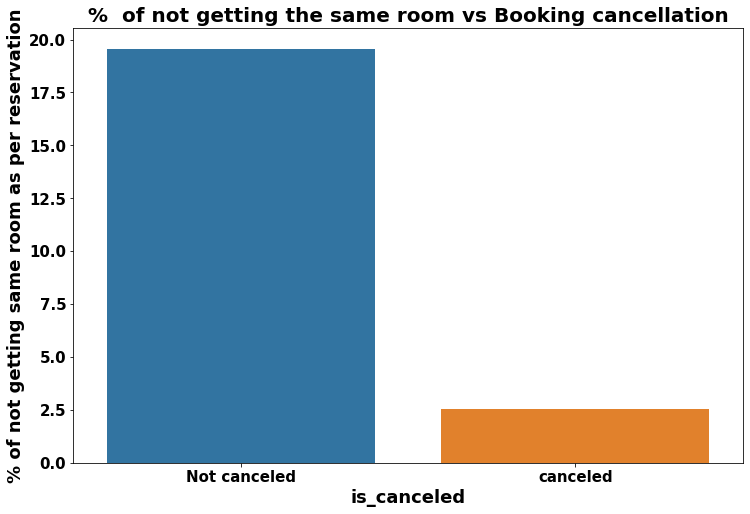

In [108]:
# create new column to df1
hotel_df['Same_room_alloted_or_not']=hotel_df.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=hotel_df.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation',fontsize=20)
plt.xlabel('is_canceled',fontsize=18)
plt.ylabel('% of not getting same room as per reservation',fontsize=18)
plt.xticks([0,1],['Not canceled','canceled'])

**Obseravtion**:

Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

13)ADR across different market segment

Text(0.5, 1.0, 'Adr across market segment')

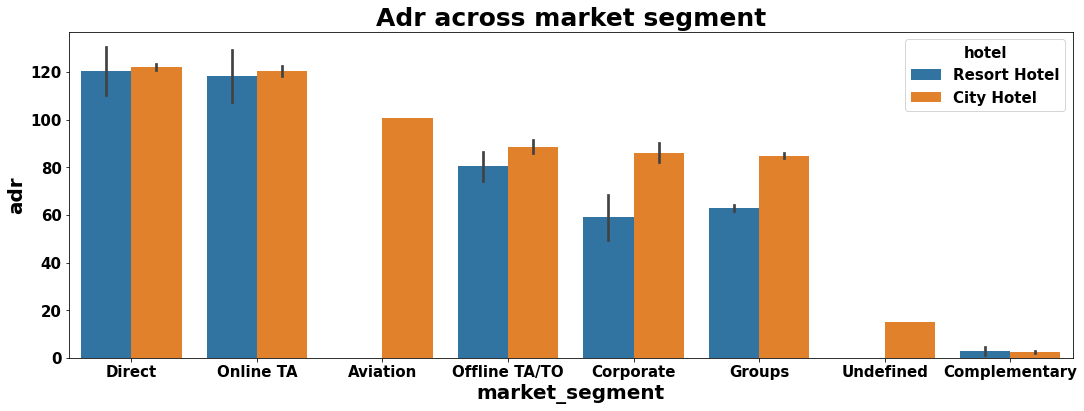

In [109]:
Groupby=hotel_df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Groupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

**Obseravtion:**

'Direct' and 'Online TA' are contributing the most in both types of hotels.

Aviation segment should focus on increasing the bookings of 'City Hotel'

**Correlation of the columns**

Text(0.5, 1.0, 'Co-relation of the columns')

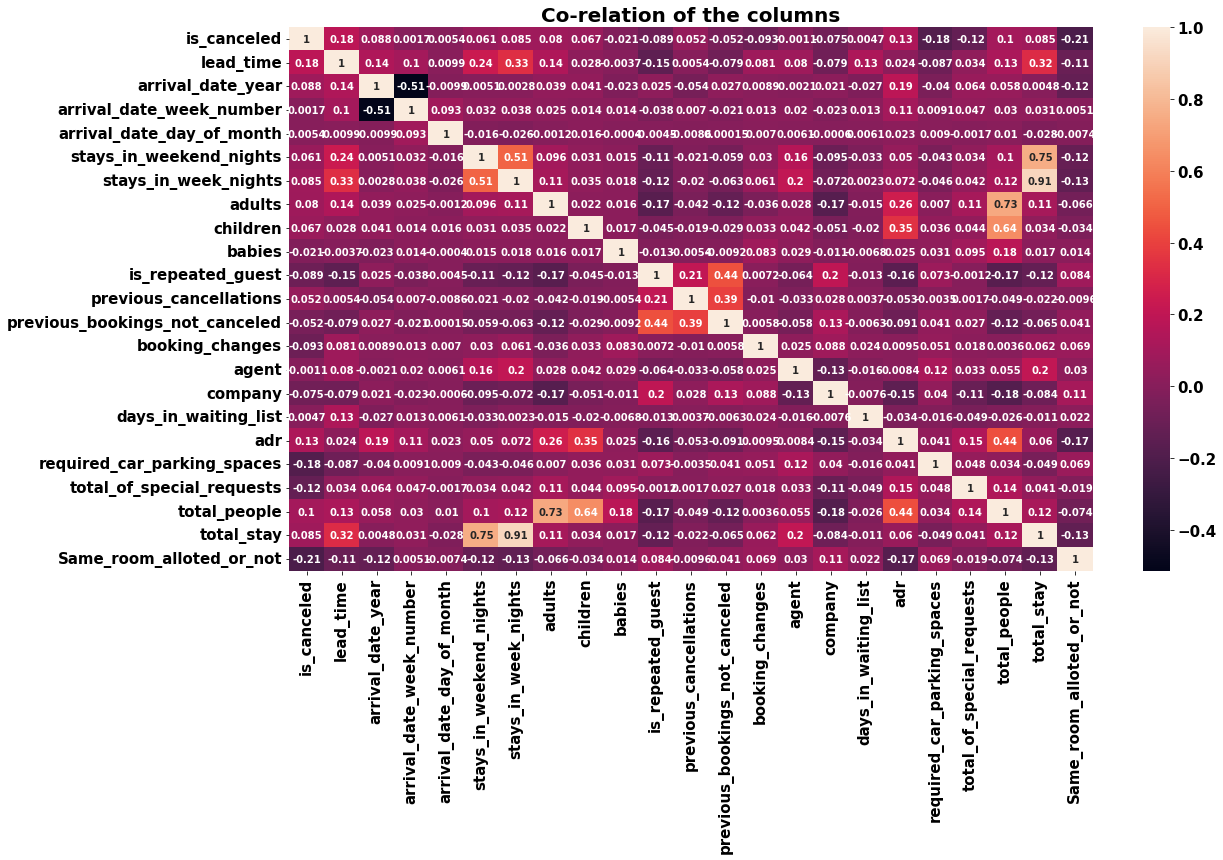

In [110]:
plt.figure(figsize=(18,10))
sns.heatmap(hotel_df.corr(),annot=True)
plt.title('Co-relation of the columns',fontsize=20)

1) is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.

2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.

3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

**Relationship between the repeated guests and previous bookings not canceled.?**

In [111]:
repeated_guests_df=hotel_df[hotel_df['is_repeated_guest']==1]
repeated_guests_df_1=hotel_df[hotel_df['is_repeated_guest']==0]

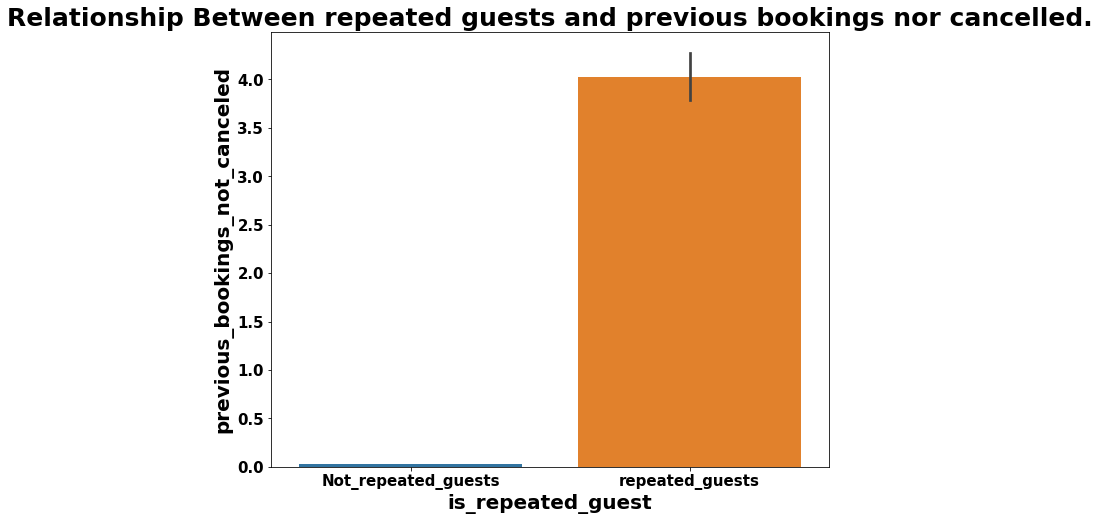

In [112]:
plt.figure(figsize=(10,8))
sns.barplot(x=hotel_df['is_repeated_guest'],y= hotel_df['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

**Observation**:

Not Repeated guests are more likely to cancel their bookings

In [113]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

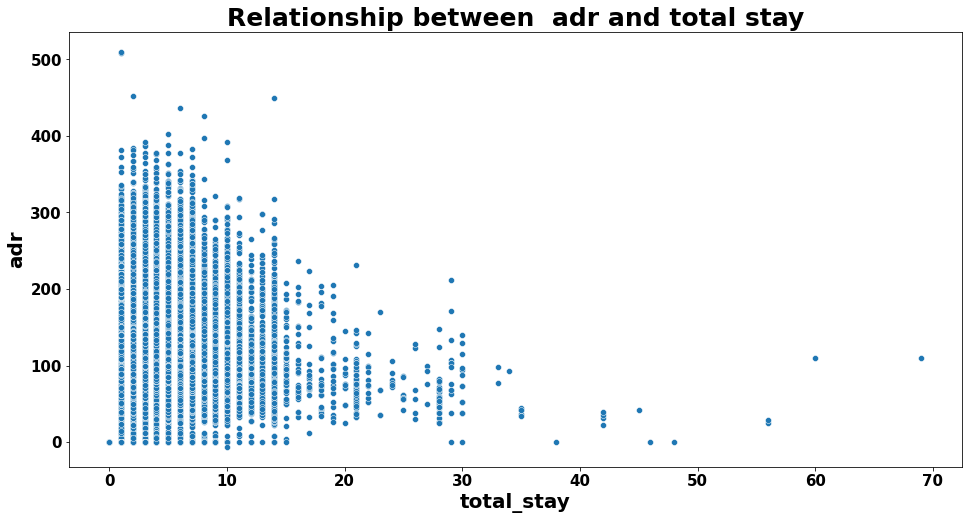

In [114]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=hotel_df['total_stay'],y=hotel_df['adr'])
plt.title('Relationship between  adr and total stay')

From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

**ADR relationship with total number of people**


Text(0.5, 1.0, 'ADR v/s Total Number of people')

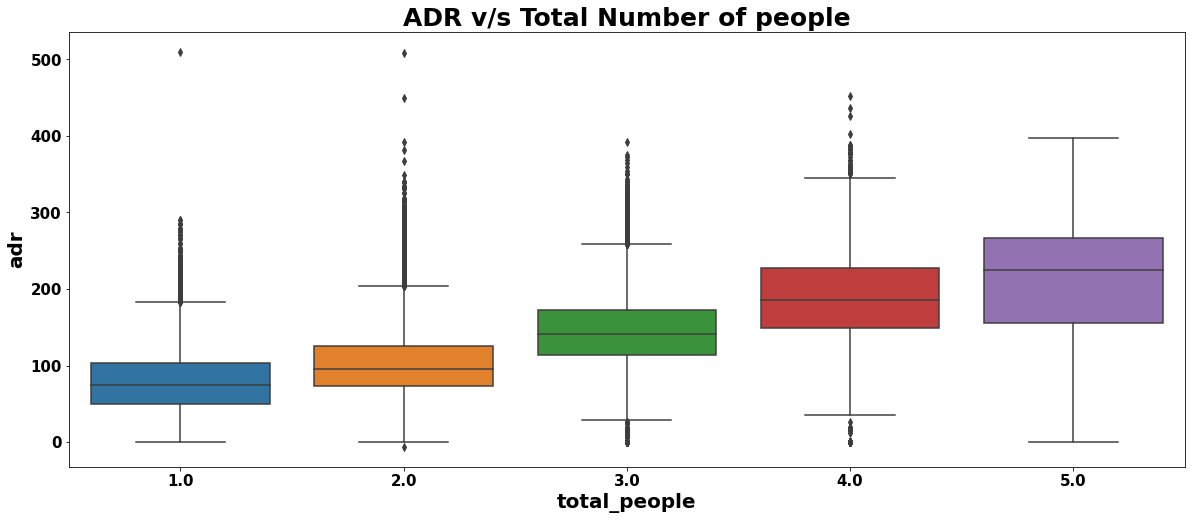

In [115]:
plt.figure(figsize=(20,8))
df1=hotel_df[hotel_df['total_people'] < 6]

sns.boxplot(x=df1['total_people'],y=df1['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

# Conclusions:

1.City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.

2.79.1 % bookings were made through TA/TO (travel agents/Tour operators).

3.Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.

4.BB( Bed & Breakfast) is the most preferred type of meal by the guests.

5.Maximum number of guests were from Portugal, i.e. more than 25000 guests.

6.27.5 % bookings were got cancelled out of all the bookings.

7.The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.

8.Most of the customers (91.6%) do not require car parking spaces.

9.Most of the bookings for City hotels and Resort hotel were happened in 2016.

10.Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.

11.Booking cancellation rate is high for City hotels which almost 30 %.

12.Average lead time for resort hotel is high.

13.Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.

14.Resort hotels have the most repeated guests.

15.Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.

16.Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.